In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import warnings

warnings.filterwarnings("ignore")

In [50]:
df = pd.read_parquet("BMW-Sensor_data.parquet")

# Data exploration and analysis

In [51]:
# Look at the first 5 rows
df.head()

,vehicle_id,timestamp,engine_temperature,oil_pressure,battery_voltage,braked_pad_wear,tire_pressure_front_left,tire_pressure_front_right,tire_pressure_rear_left,tire_pressure_rear_right,transmission_temperature,fuel_level,odometer,latitude,longitude
0,BMW123,2023-05-10T16:58:53Z,108.6,47.8,13.7,86.9,32.2,31.1,34.4,31.3,92.4,95.0,40893.0,37.7660,-122.4209
1,BMW123,2023-05-10T16:58:54Z,85.0,45.6,12.0,42.3,31.2,33.3,31.7,34.3,84.2,43.8,33845.0,37.7651,-122.4587
2,BMW123,2023-05-10T16:58:55Z,101.3,40.8,13.8,99.6,30.4,31.9,34.7,31.2,93.9,20.1,40802.0,37.7119,-122.4041
3,BMW123,2023-05-10T16:58:56Z,97.8,45.6,12.2,29.4,31.8,32.6,33.2,33.8,81.6,86.8,33285.0,37.7591,-122.4381
4,BMW123,2023-05-10T16:58:57Z,102.6,41.5,13.7,78.9,34.3,30.9,34.2,32.9,79.5,29.3,39248.0,37.7020,-122.4848


In [52]:
# Check the data types
print(df.dtypes)

vehicle_id                    object
timestamp                     object
engine_temperature           float64
oil_pressure                 float64
battery_voltage              float64
braked_pad_wear              float64
tire_pressure_front_left     float64
tire_pressure_front_right    float64
tire_pressure_rear_left      float64
tire_pressure_rear_right     float64
transmission_temperature     float64
fuel_level                   float64
odometer                     float64
latitude                     float64
longitude                    float64
dtype: object


In [53]:
# Check for missing values
print(df.isnull().sum())

vehicle_id                   0
timestamp                    0
engine_temperature           0
oil_pressure                 0
battery_voltage              0
braked_pad_wear              0
tire_pressure_front_left     0
tire_pressure_front_right    0
tire_pressure_rear_left      0
tire_pressure_rear_right     0
transmission_temperature     0
fuel_level                   0
odometer                     0
latitude                     0
longitude                    0
dtype: int64


In [54]:
df.describe()

,engine_temperature,oil_pressure,battery_voltage,braked_pad_wear,tire_pressure_front_left,tire_pressure_front_right,tire_pressure_rear_left,tire_pressure_rear_right,transmission_temperature,fuel_level,odometer,latitude,longitude
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,94.087333,45.228000,12.943333,51.571000,32.506333,32.469333,32.491667,32.514000,82.289667,49.065000,31136.033333,37.747667,-122.453091
std,8.718955,2.797984,0.592587,29.051708,1.446826,1.495968,1.396016,1.451722,7.254863,30.354039,11295.646447,0.028510,0.029216
min,80.100000,40.000000,12.000000,0.400000,30.000000,30.000000,30.000000,30.000000,70.200000,0.000000,10093.000000,37.700300,-122.499800
25%,86.275000,42.700000,12.500000,28.800000,31.200000,31.100000,31.375000,31.200000,75.600000,21.425000,21391.500000,37.724125,-122.478400
50%,93.700000,45.500000,12.900000,51.950000,32.700000,32.400000,32.500000,32.600000,82.250000,48.450000,32105.000000,37.747650,-122.454600
75%,102.600000,47.525000,13.400000,74.425000,33.600000,33.700000,33.600000,33.700000,88.925000,76.650000,40774.250000,37.770525,-122.427625
max,109.900000,49.900000,14.000000,99.900000,34.900000,35.000000,35.000000,35.000000,95.000000,99.600000,49969.000000,37.798700,-122.400500


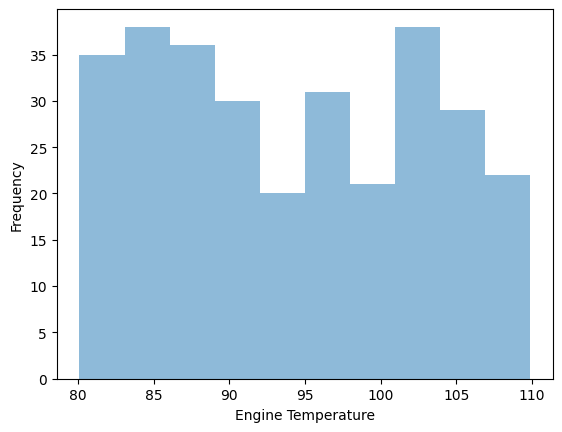

In [55]:
# Histogram of engine temperature
plt.hist(df['engine_temperature'], bins=10, alpha=0.5)
plt.xlabel('Engine Temperature')
plt.ylabel('Frequency')
plt.show()

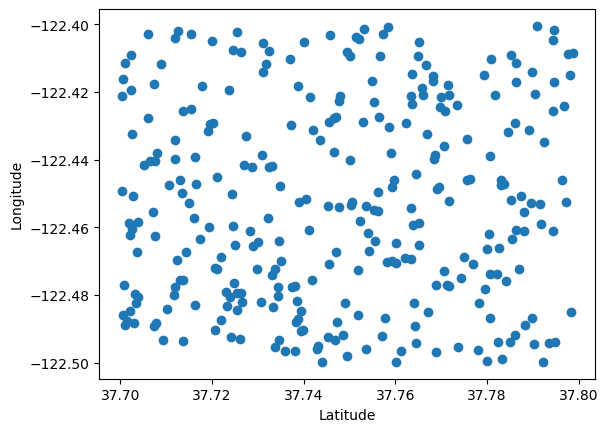

In [56]:
# Scatter plot of latitude and longitude
plt.scatter(df['latitude'], df['longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

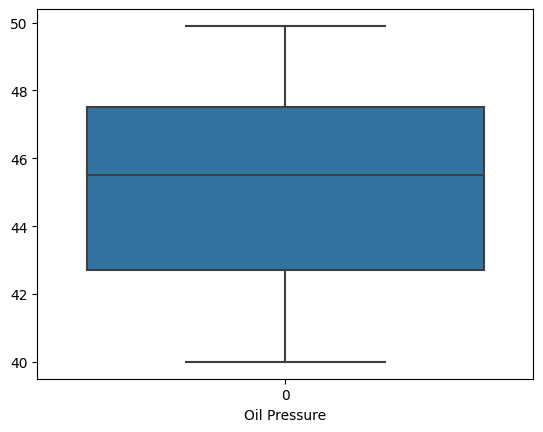

In [57]:
# Boxplot of oil pressure
sns.boxplot(df['oil_pressure'])
plt.xlabel('Oil Pressure')
plt.show()

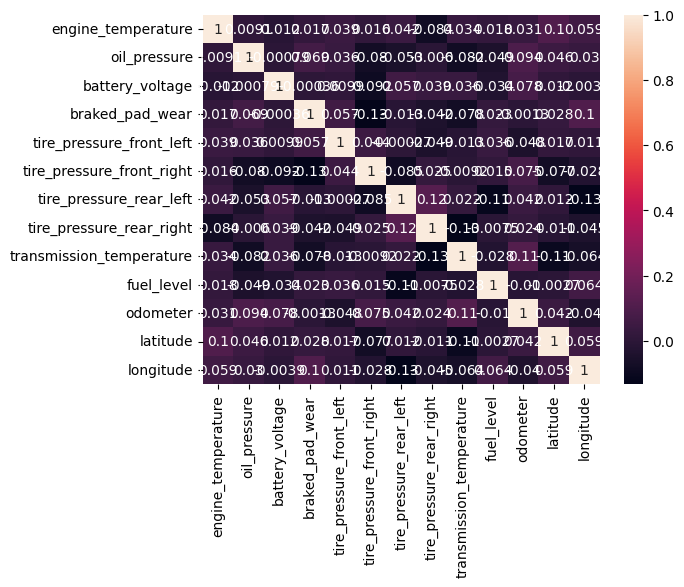

In [58]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Feature engineering

In [59]:
# Drop vehicle_id and timestamp
df = df.drop(['vehicle_id', 'timestamp'], axis=1)

In [60]:
df['temp_to_pressure_ratio'] = df['engine_temperature'] / df['oil_pressure']

# Apply PCA and keep the first two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [61]:
df.head()

,principal_component_1,principal_component_2
0,-0.865224,1.754877
1,-0.240225,-0.241680
2,-0.857155,-0.539070
3,-0.190565,1.033001
4,-0.719350,-0.404525


# Anomaly Detection

In [62]:
# Initialize the Isolation Forest model
# The contamination parameter can be used to control the proportion of outliers in the dataset
model = IsolationForest(contamination=0.01)

# Fit the model to the data
model.fit(df[['principal_component_1', 'principal_component_2']])

# Use the model to predict anomalies in the data
# The model returns 1 for normal instances and -1 for anomalies
df['anomaly'] = model.predict(df[['principal_component_1', 'principal_component_2']])

# Print the number of anomalies detected
print(df['anomaly'].value_counts())

 1    297
-1      3
Name: anomaly, dtype: int64


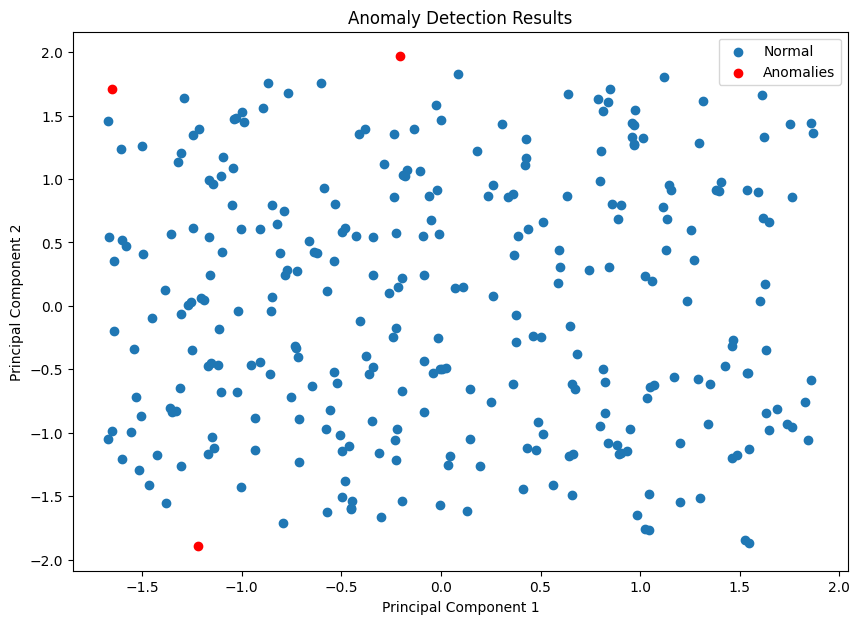

In [63]:
# Separate the anomalies and normal instances into their own dataframes
anomalies = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

# Scatter plot of the data, with different colors for anomalies and normal instances
plt.figure(figsize=(10, 7))
plt.scatter(normal['principal_component_1'], normal['principal_component_2'], label='Normal')
plt.scatter(anomalies['principal_component_1'], anomalies['principal_component_2'], label='Anomalies', color='r')
plt.legend()
plt.title('Anomaly Detection Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()